In [1]:
import pygrib
import numpy as np
from numpy import fft
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
#gfs on 1degree lat/lon grid from NOMADS server in grib2 format
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/
#use get_gfs.csh
date = '20200922' # YYYYMMDD
modelRun = '00' # HH
#specify forecast hour of file
forecastHour = '000' # HHH
#local path
path='/uufs/chpc.utah.edu/common/home/u0035056/atmos6010/data/'+date+modelRun
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour+'.grib2'

#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Visibility vis 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Wind speed (gust) gust 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInPa 40 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
iso

isobaricInhPa 150 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Ozone mixing ratio o3mr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Relative humidity r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Geometric vertical velocity wz 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isoba

isobaricInhPa 600 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Relative humidity r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Geometric vertical velocity wz 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 650 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaric

depthBelowLandLayer 0 Volumetric soil moisture content soilw 2020-09-22 00:00:00 2020-09-22 00:00:00 0
depthBelowLandLayer 1 Soil Temperature st 2020-09-22 00:00:00 2020-09-22 00:00:00 0
depthBelowLandLayer 1 Volumetric soil moisture content soilw 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Water equivalent of accumulated snow depth sdwe 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Snow depth sde 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 2 2 metre temperature 2t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 2 Specific humidity q 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 2 2 metre dewpoint temperature 2d 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 2 2 metre relative humidity 2r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 2 Apparent temperature aptmp 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 10 10 metre U wind component 10u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAbo

In [3]:
# get 500 hPa temperature which is in K
t_500_all = grbs.select(shortName='t',level=500)
t_500_a = (t_500_all[0].values)
#what are the dimensions? note lat first, lon second
print(np.shape(t_500_a))
# Get the lat/lon grids from the grib2 file
lats_all, lons_all = t_500_all[0].latlons()

# get 700 hPa height
h_700_all = grbs.select(shortName='gh',level=700)
# Extract the values
h_700_a = h_700_all[0].values
# get 300 hPa height
h_300_all = grbs.select(shortName='gh',level=300)
# Extract the values
h_300_a = h_300_all[0].values

(181, 360)


In [4]:
# get 850 hPa temperature which is in K
t_850_all = grbs.select(shortName='t',level=850)
t_850_a = (t_850_all[0].values)

# get 1000 hPa height
h_1000_all = grbs.select(shortName='gh',level=1000)
# Extract the values
h_1000_a = h_1000_all[0].values

grbs.close()

In [5]:
#make the data more manageable in this case for a NH projection
#upper left corner lat/lon
ult = 90
uln = 0
#lower right corner lat/lon
rlt = 20
rln = 360
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays and convert temp to C
t500 = -273.15 + t_500_a[ulti:rlti,ulni:rlni]
z700 = h_700_a[ulti:rlti,ulni:rlni]
z300 = h_300_a[ulti:rlti,ulni:rlni]
t850 = -273.15 + t_850_a[ulti:rlti,ulni:rlni]
z1000 = h_1000_a[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]

In [6]:
#setup projection
#plot as polar stereographic
mapcrs = ccrs.NorthPolarStereo(central_longitude=-90)
states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()

In [7]:
#setup projection for more local domain
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-97.5,
                               central_latitude=38.5,
                               standard_parallels=(30, 60))

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

In [8]:
#compute 300-700 hPa thickness after smoothing
#smooth fields to reduce chatter
z300s = mpcalc.smooth_gaussian(z300,5)
z700s = mpcalc.smooth_gaussian(z700,5)
t500s = mpcalc.smooth_gaussian(t500,5)
th_300_700 = z300s - z700s
#compute 1000-700 hPa thickness after smoothing
#smooth fields to reduce chatter
z1000s = mpcalc.smooth_gaussian(z1000,5)
t850s = mpcalc.smooth_gaussian(t850,5)
th_700_1000 = z700s - z1000s
print(np.min(z300s),np.max(z300s))
print(np.min(z700s),np.max(z700s))
print(np.min(z1000s),np.max(z1000s))
print(np.min(th_700_1000),np.max(th_700_1000))
print(np.min(t500s),np.max(t500s))
print(np.min(t850s),np.max(t850s))
levels_700 = np.arange(2520,3600,60)
levels_300 = np.arange(8520,9900,60)
levels_th_37 = np.arange(5520,6660,60)
levels_500 = np.arange(-30,3,3)
levels_th_710 = np.arange(2520,3600,30)
levels_850 = np.arange(-15,30,3)

8547.0908203125 dimensionless 9792.3115234375 dimensionless
2583.748291015625 dimensionless 3261.086669921875 dimensionless
-267.14447021484375 dimensionless 261.8475036621094 dimensionless
2595.45263671875 dimensionless 3137.97705078125 dimensionless
-39.323970794677734 dimensionless -0.3442896902561188 dimensionless
-24.021509170532227 dimensionless 29.298917770385742 dimensionless


In [9]:
#plot the geopotential heights and 300-700 hPa thickness 
#fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': mapcrs})
#ax.set_extent([-140,-60,20,60])
# Plot thickness field
#cs=ax.contour(lons,lats,th_300_700,levels=levels_th,transform=ccrs.PlateCarree(),colors='black',linewidth=2)
#plt.clabel(cs,fmt='%1.f',inline=True)
#cs=ax.contour(lons,lats,z700,levels=levels_700,transform=ccrs.PlateCarree(),colors='green',linewidth=1)
#plt.clabel(cs,fmt='%1.f',inline=True)
#cs=ax.contour(lons,lats,z300,levels=levels_300,transform=ccrs.PlateCarree(),colors='red',linewidth=1)
#plt.clabel(cs,fmt='%1.f',inline=True)

#print(g.validDate)
#ax.add_feature(states,edgecolor='tan',zorder=99,linewidth=2.5)
#ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99,linewidth=2.5)
#ax.gridlines(draw_labels=False)
#ax.set_title('300-700 hPa thickness, 300 & 700 hPa heights %s' % g.validDate, fontsize=16)
#plot_file = '../figs/gfs_300_700_thick_' + date + modelRun + forecastHour + '.png'
#plt.savefig(plot_file)
#plt.show()

/uufs/chpc.utah.edu/common/home/u0035056/anaconda3/envs/atmos6010/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


2020-09-22 00:00:00


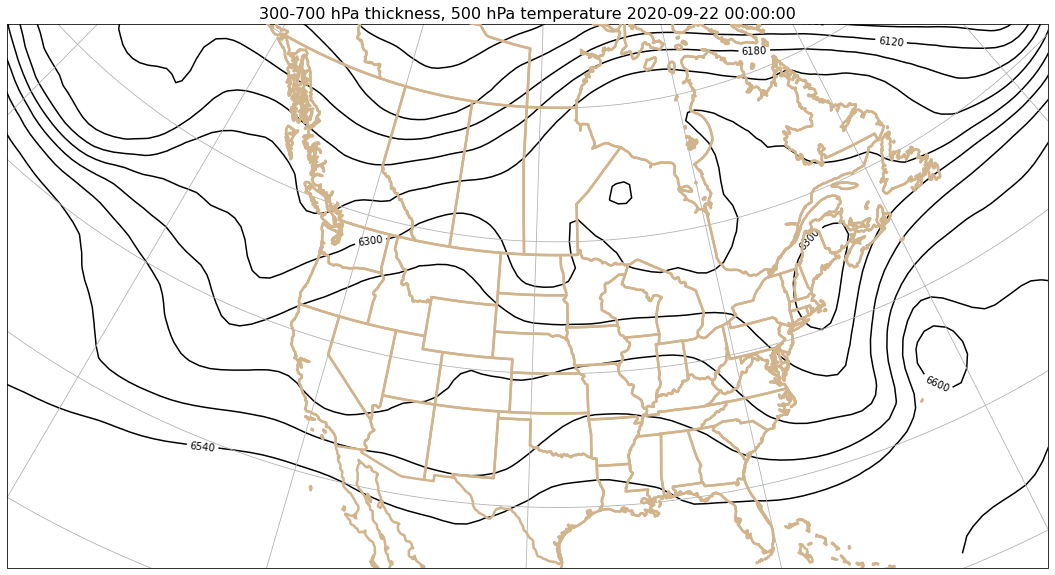

In [10]:
#plot the 500 hPa temperature and 300-700 hPa thickness 
fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot thickness field
cs=ax.contour(lons,lats,th_300_700,levels=levels_th_37,transform=ccrs.PlateCarree(),colors='black',linewidth=2)
plt.clabel(cs,fmt='%1.f',inline=True)
#cs=ax.contour(lons,lats,t500s,levels=levels_500,transform=ccrs.PlateCarree(),colors='blue',linewidth=1)
#plt.clabel(cs,fmt='%1.f',inline=True)

print(g.validDate)
ax.add_feature(states,edgecolor='tan',zorder=99,linewidth=2.5)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99,linewidth=2.5)
ax.gridlines(draw_labels=False)
ax.set_title('300-700 hPa thickness, 500 hPa temperature %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_300_700_thick_500t' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()

2020-09-22 00:00:00


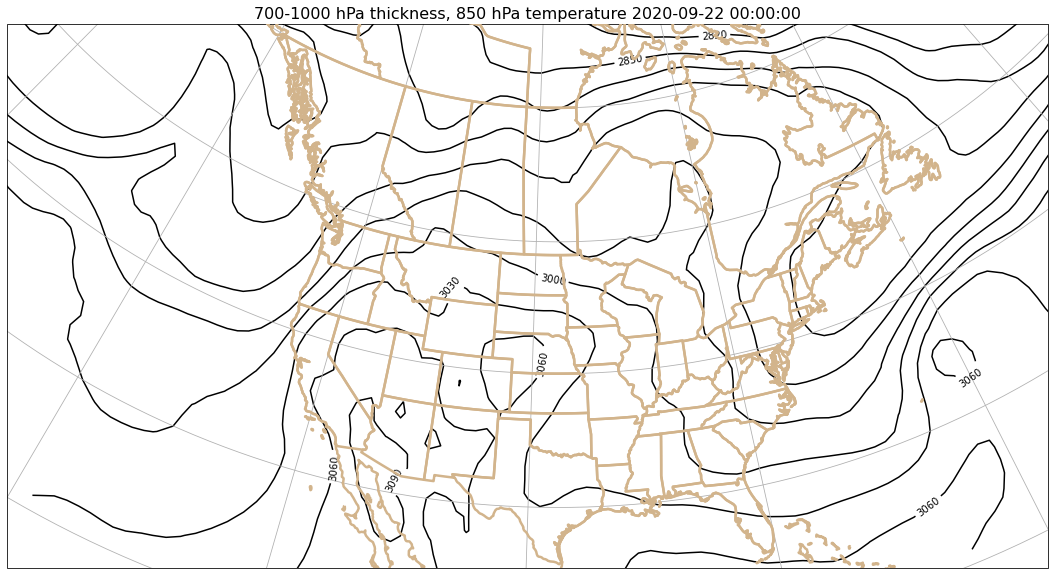

In [11]:
#plot the 850 hPa temperature and 1000-700 hPa thickness 
fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot thickness field
cs=ax.contour(lons,lats,th_700_1000,levels=levels_th_710,transform=ccrs.PlateCarree(),colors='black',linewidth=2)
plt.clabel(cs,fmt='%1.f',inline=True)
#cs=ax.contour(lons,lats,t850s,levels=levels_850,transform=ccrs.PlateCarree(),colors='blue',linewidth=1)
#plt.clabel(cs,fmt='%1.f',inline=True)

print(g.validDate)
ax.add_feature(states,edgecolor='tan',zorder=99,linewidth=2.5)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99,linewidth=2.5)
ax.gridlines(draw_labels=False)
ax.set_title('700-1000 hPa thickness, 850 hPa temperature %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_700_1000_thick_850t' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()